In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
fbi = pd.read_csv('fbi_reports.csv')

us_pop = pd.read_csv('US_Population.csv')

c:\users\johna\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# removes all rows where the record has a victim age of 998
fbi = fbi.ix[lambda df: df['Victim Age'] < 122, :]

fbi.drop(['Record Source'],inplace=True,axis=1)
fbi.drop(['Agency Code'],inplace=True,axis=1)
fbi.drop(['Agency Name'],inplace=True,axis=1)
fbi.drop(['Agency Type'],inplace=True,axis=1)

In [5]:
fbi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637480 entries, 0 to 638453
Data columns (total 20 columns):
Record ID                637480 non-null int64
City                     637480 non-null object
State                    637480 non-null object
Year                     637480 non-null int64
Month                    637480 non-null object
Incident                 637480 non-null int64
Crime Type               637480 non-null object
Crime Solved             637480 non-null object
Victim Sex               637480 non-null object
Victim Age               637480 non-null int64
Victim Race              637480 non-null object
Victim Ethnicity         637480 non-null object
Perpetrator Sex          637480 non-null object
Perpetrator Age          637480 non-null object
Perpetrator Race         637480 non-null object
Perpetrator Ethnicity    637480 non-null object
Relationship             637480 non-null object
Weapon                   637480 non-null object
Victim Count             6374

In [6]:
us_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
Year                 35 non-null int64
US_Population        35 non-null int64
black_population     4 non-null float64
white_population     4 non-null float64
asian_population     4 non-null float64
native_population    4 non-null float64
dtypes: float64(4), int64(2)
memory usage: 1.7 KB


In [7]:
fbi.head()

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
0,1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0
1,2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
2,3,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0
3,4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
4,5,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1


In [8]:
# removes the record id and year columns
fbi.loc[:, ['Incident', 'Victim Age', 'Victim Count', 'Perpetrator Count']].describe()

,Incident,Victim Age,Victim Count,Perpetrator Count
count,637480.000000,637480.000000,637480.000000,637480.000000
mean,22.988102,33.562204,0.123303,0.185308
std,92.213585,17.792594,0.537756,0.585502
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,0.000000,0.000000
50%,2.000000,30.000000,0.000000,0.000000
75%,10.000000,42.000000,0.000000,0.000000
max,999.000000,99.000000,10.000000,10.000000


In [9]:
fbi.loc[:, ['Incident', 'Victim Age', 'Victim Count', 'Perpetrator Count']].corr()

,Incident,Victim Age,Victim Count,Perpetrator Count
Incident,1.000000,-0.004339,0.001815,0.001948
Victim Age,-0.004339,1.000000,-0.021997,-0.032754
Victim Count,0.001815,-0.021997,1.000000,0.067106
Perpetrator Count,0.001948,-0.032754,0.067106,1.000000


# Incidents by Year

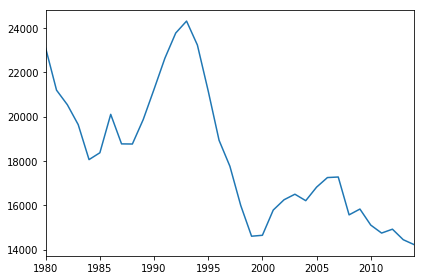

In [10]:
fbi['Year'].value_counts().sort_index(ascending=True).plot()
plt.tight_layout()

# Crime Types

98.5712492940955

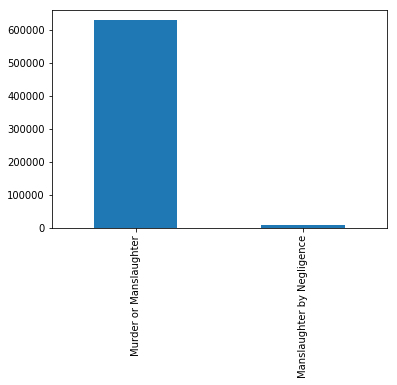

In [11]:
fbi['Crime Type'].value_counts().plot(kind='bar')

(628372 / (628372 + 9108)) * 100    # percentage of crimes that are Murder or Manslaughter

# Crime Solved?

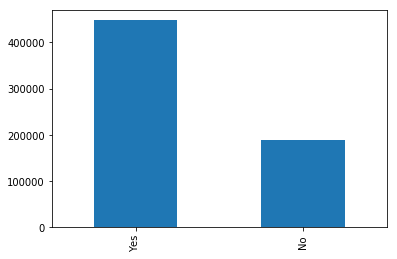

In [12]:
fbi['Crime Solved'].value_counts().plot(kind='bar')

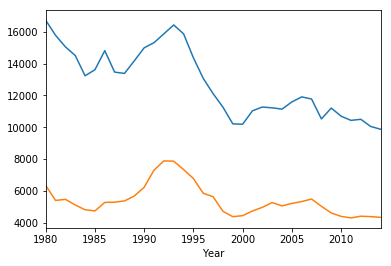

In [13]:
# plots the number of crimes solved over time
fbi_crimes_solved_y = fbi.ix[lambda df: df['Crime Solved'] == 'Yes', :]
fbi_crimes_solved_y.groupby('Year').count()['Crime Solved'].plot()

# plots the number of crimes that were NOT solved over time
fbi_crimes_solved_n = fbi.ix[lambda df: df['Crime Solved'] == 'No', :]
fbi_crimes_solved_n.groupby('Year').count()['Crime Solved'].plot()

# Victim Ages

(array([ 20152.,   3852.,   2601.,   4901.,  18649.,  54438.,  91314.,
         65238.,  55701.,  50540.,  55575.,  34161.,  30370.,  32043.,
         19416.,  16798.,  17439.,  10177.,   8830.,   7208.,   7377.,
          4945.,   4168.,   4548.,   2832.,   2078.,   1755.,    652.,
           332.,   9390.]),
 array([  0. ,   3.3,   6.6,   9.9,  13.2,  16.5,  19.8,  23.1,  26.4,
         29.7,  33. ,  36.3,  39.6,  42.9,  46.2,  49.5,  52.8,  56.1,
         59.4,  62.7,  66. ,  69.3,  72.6,  75.9,  79.2,  82.5,  85.8,
         89.1,  92.4,  95.7,  99. ]),
 <a list of 30 Patch objects>)

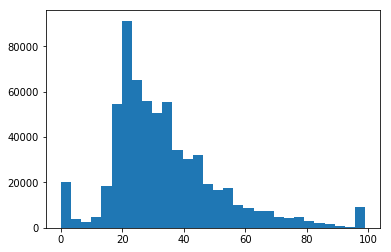

In [14]:
plt.hist(fbi['Victim Age'], bins=30)

{'boxes': [<matplotlib.lines.Line2D at 0x939ead0>],
 'caps': [<matplotlib.lines.Line2D at 0x9287070>,
 'fliers': [<matplotlib.lines.Line2D at 0x9287ed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x9287d70>],
 'whiskers': [<matplotlib.lines.Line2D at 0x939ea10>,
  <matplotlib.lines.Line2D at 0x939e470>]}

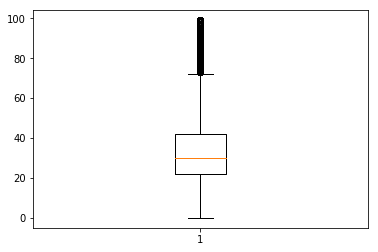

In [15]:
plt.boxplot(fbi['Victim Age'])

# Number of Incidents by Race

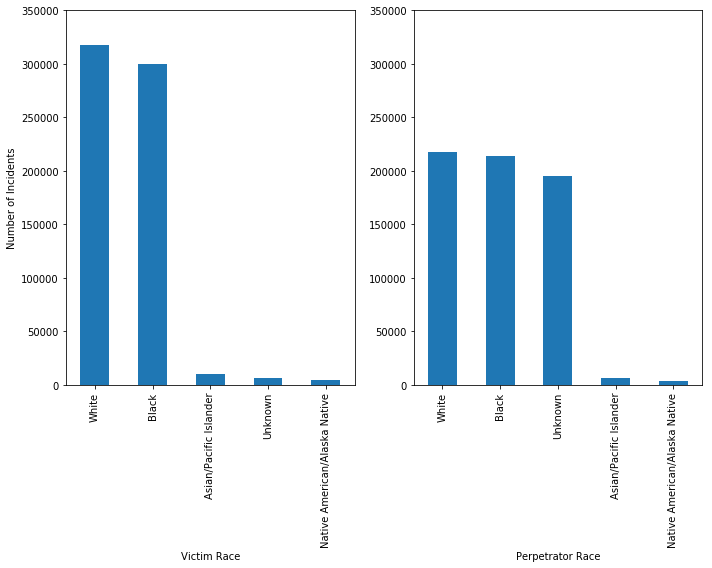

In [16]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
fbi['Victim Race'].value_counts().plot(kind='bar')
plt.xlabel('Victim Race')
plt.ylabel('Number of Incidents')
plt.ylim(0, 350000)

plt.subplot(1, 2, 2)
fbi['Perpetrator Race'].value_counts().plot(kind='bar')
plt.xlabel('Perpetrator Race')
plt.ylim(0, 350000)

plt.tight_layout()

Plots the races of victims and the races of perpetrators within the dataset.

# Weapon Usage in Incidents

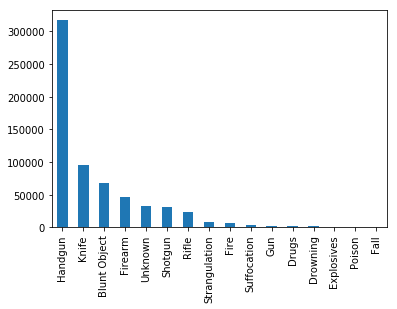

In [17]:
fbi['Weapon'].value_counts().plot(kind='bar')

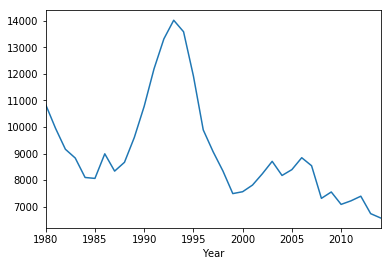

In [18]:
# plots the number of handgun incidents over time

fbi_handgun = fbi.ix[lambda df: df['Weapon'] == 'Handgun', :]
fbi_handgun.groupby('Year').count()['Weapon'].plot()

# FBI Reports by Location

Plots the number of times a specfic type of weapon has been used.

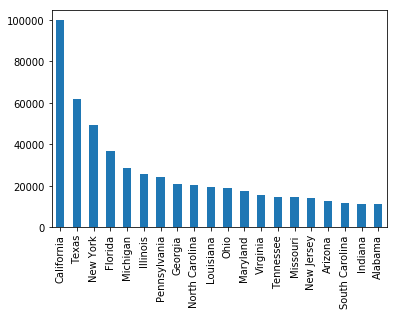

In [19]:
fbi['State'].value_counts()[:20].plot(kind='bar')

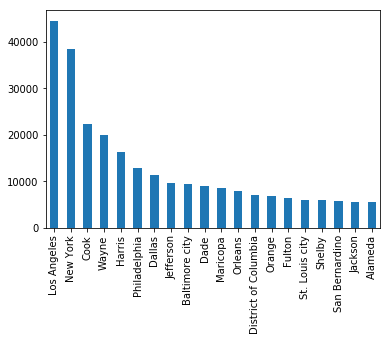

In [20]:
fbi['City'].value_counts()[:20].plot(kind='bar')

# Incidents by Relationship

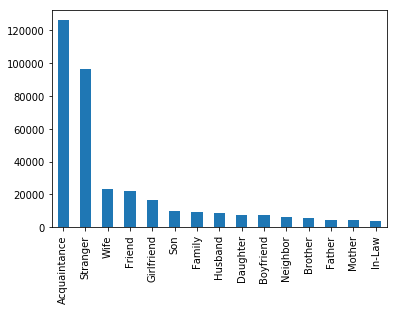

In [21]:
# removes unknown values from relationship column
fbi_rel = fbi.ix[lambda df: df['Relationship'] != 'Unknown', :]


fbi_rel['Relationship'].value_counts()[:15].plot(kind='bar')

# FBI Reports Victim Groups

In [22]:
fbi['Victim Race'].value_counts()

White                            317285
Black                            299788
Asian/Pacific Islander             9888
Unknown                            5954
Native American/Alaska Native      4565
Name: Victim Race, dtype: int64

In [29]:
fbi['Victim Ethnicity'].value_counts()

Unknown         367379
Not Hispanic    197465
Hispanic         72636
Name: Victim Ethnicity, dtype: int64

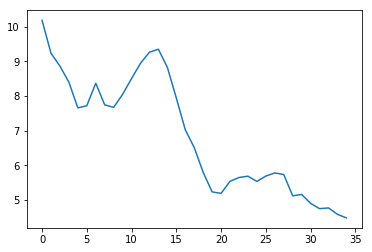

In [30]:
x = fbi.groupby('Year').count()['Crime Solved']
y = us_pop['US_Population']

z = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(z)

# Incidents by Victim Race 

## Incidents Concerning Black Victims

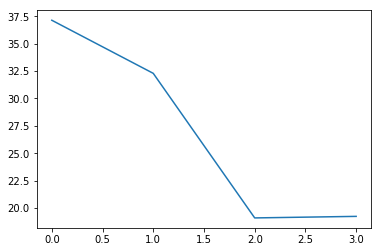

In [32]:
black_incidents = fbi[fbi['Victim Race'] == 'Black']

x = black_incidents.groupby('Year').count()['Crime Solved'].iloc[0], black_incidents.groupby('Year').count()['Crime Solved'].iloc[9], black_incidents.groupby('Year').count()['Crime Solved'].iloc[19], black_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['black_population'][0], us_pop['black_population'][10], us_pop['black_population'][20], us_pop['black_population'][30]

black_vic = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(black_vic)


## Incidents Concerning White Victims

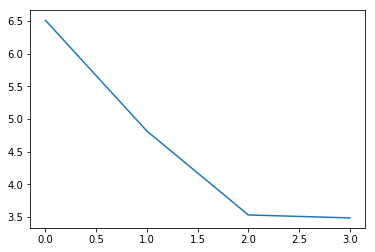

In [33]:
white_incidents = fbi[fbi['Victim Race'] == 'White']

x = white_incidents.groupby('Year').count()['Crime Solved'].iloc[0], white_incidents.groupby('Year').count()['Crime Solved'].iloc[9], white_incidents.groupby('Year').count()['Crime Solved'].iloc[19], white_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['white_population'][0], us_pop['white_population'][10], us_pop['white_population'][20], us_pop['white_population'][30]

white_vic = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(white_vic)

## Incidents Concerning Asian Victims

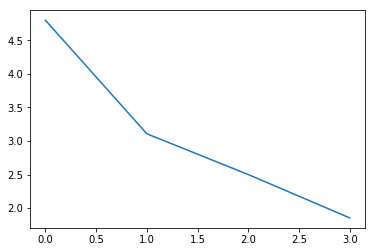

In [34]:
asian_incidents = fbi[fbi['Victim Race'] == 'Asian/Pacific Islander']

x = asian_incidents.groupby('Year').count()['Crime Solved'].iloc[0], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[9], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[19], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['asian_population'][0], us_pop['asian_population'][10], us_pop['asian_population'][20], us_pop['asian_population'][30]

asian_vic = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(asian_vic)

## Incidents Concerning Native American Victims

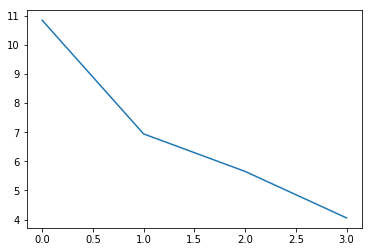

In [35]:
native_incidents = fbi[fbi['Victim Race'] == 'Native American/Alaska Native']

x = native_incidents.groupby('Year').count()['Crime Solved'].iloc[0], native_incidents.groupby('Year').count()['Crime Solved'].iloc[9], native_incidents.groupby('Year').count()['Crime Solved'].iloc[19], native_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['native_population'][0], us_pop['native_population'][10], us_pop['native_population'][20], us_pop['native_population'][30]

native_vic = [i/j * 100000 for i,j in zip(x, y)]
native_vic
plt.plot(native_vic)

In [ ]:
stats.kruskal(black_vic, white_vic, native_vic, asian_vic)

# Incidents by Perpetrator Race

## Incidents concerning Black perpetrators

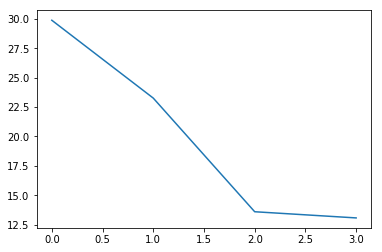

In [36]:
black_incidents = fbi[fbi['Perpetrator Race'] == 'Black']

x = black_incidents.groupby('Year').count()['Crime Solved'].iloc[0], black_incidents.groupby('Year').count()['Crime Solved'].iloc[9], black_incidents.groupby('Year').count()['Crime Solved'].iloc[19], black_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['black_population'][0], us_pop['black_population'][10], us_pop['black_population'][20], us_pop['black_population'][30]

black_perp = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(black_perp)

## Incidents concerning White perpetrators

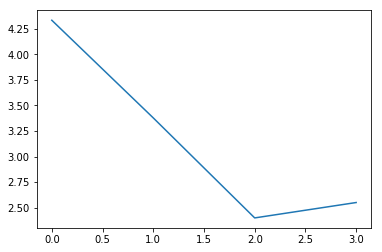

In [42]:
white_incidents = fbi[fbi['Perpetrator Race'] == 'White']

x = white_incidents.groupby('Year').count()['Crime Solved'].iloc[0], white_incidents.groupby('Year').count()['Crime Solved'].iloc[9], white_incidents.groupby('Year').count()['Crime Solved'].iloc[19], white_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['white_population'][0], us_pop['white_population'][10], us_pop['white_population'][20], us_pop['white_population'][30]

white_perp = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(white_perp)

## Incidents concerning Asian perpetrators

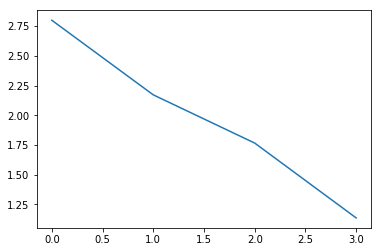

In [38]:
asian_incidents = fbi[fbi['Perpetrator Race'] == 'Asian/Pacific Islander']

x = asian_incidents.groupby('Year').count()['Crime Solved'].iloc[0], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[9], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[19], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['asian_population'][0], us_pop['asian_population'][10], us_pop['asian_population'][20], us_pop['asian_population'][30]

asian_perp = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(asian_perp)

## Incidents concerning Native American perpetrators

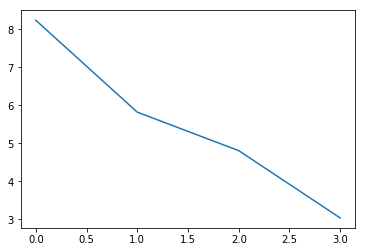

In [39]:
native_incidents = fbi[fbi['Perpetrator Race'] == 'Native American/Alaska Native']

x = native_incidents.groupby('Year').count()['Crime Solved'].iloc[0], native_incidents.groupby('Year').count()['Crime Solved'].iloc[9], native_incidents.groupby('Year').count()['Crime Solved'].iloc[19], native_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['native_population'][0], us_pop['native_population'][10], us_pop['native_population'][20], us_pop['native_population'][30]

native_perp = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(native_perp)

In [40]:
stats.kruskal(black_perp, white_perp, asian_perp, native_perp)

KruskalResult(statistic=12.794117647058826, pvalue=0.0051036675550819692)

In [28]:
# p-value -> measure of sampling error
# low p-value -> statistical significance 
# low p-value -> probability of results being due to chance is low